Author: João Alex Arruda da Silva

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
from pathlib import Path
import tarfile
import urllib.request


def load_dataset(data_file: str, extension: str = ".tar.xz"):
    """Download and extract a a file from a URL, and load a CSV file into a DataFrame.

    Args:
        data_file (str): name of the CSV file
        extension (str, optional): extension of the compressed file. Defaults to ".tar.xz".

    Returns:
        _type_: pandas.DataFrame
    """
    tarball_path = Path(f"datasets/{data_file + extension}")
    data_url = "https://github.com/joaoalexarruda/data_ipp/raw/main/" + data_file + extension
    if not tarball_path.is_file():
        Path("datasets").mkdir(exist_ok=True, parents=True)
        urllib.request.urlretrieve(data_url, tarball_path)
        with tarfile.open(tarball_path) as tar:
            tar.extractall(path="datasets")
    return pd.read_csv(f"datasets/{data_file}/{data_file}.csv")

## PRIMEIRA PARTE

**A. incendios_sc.csv**

    1ª etapa: verificação inicial dos dados

In [24]:
# Lê-se o dataset de incêndios e o armazena em um dataframe
df_incendios = load_dataset(data_file="incendios_sv")
df_incendios.head(2)

,DataHora,Satelite,Municipi,RiscoFog
0,2018/01/01 00:04:15,GOES-16,MARCELANDIA,0.0
1,2018/01/01 00:29:09,GOES-13,MAUES,NaN


    Qual é a dimensão do conjunto de dados?

In [25]:
print(
    f"Há {df_incendios.shape[0]} linhas e {df_incendios.shape[1]} colunas no dataset. Logo {df_incendios.size} elementos.")

Há 9468639 linhas e 4 colunas no dataset. Logo 37874556 elementos.


    Qual o nome das colunas e que tipo de dados que lhe estão associados?

In [26]:
df_incendios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9468639 entries, 0 to 9468638
Data columns (total 4 columns):
 #   Column    Dtype  
---  ------    -----  
 0   DataHora  object 
 1   Satelite  object 
 2   Municipi  object 
 3   RiscoFog  float64
dtypes: float64(1), object(3)
memory usage: 289.0+ MB


    Existem valores NaN? Se sim, em quantidade significativa? Em que colunas?

In [27]:
# Verificando se há valores nulos
df_incendios.isna().sum()

DataHora         0
Satelite         0
Municipi         0
RiscoFog    159123
dtype: int64

Como observado em `df_incendios.isna().sum()`, há uma quantidade expressiva de valores NaN na coluna RiscoFog.

    Qual é o intervalo temporal a que o conjunto de dados se reporta?

In [28]:
# Alterou-se o tipo da coluna DataHora para datetime
df_incendios['DataHora'] = pd.to_datetime(df_incendios['DataHora'])

In [29]:
from dateutil.relativedelta import relativedelta

min_datahora = df_incendios['DataHora'].min()
max_datahora = df_incendios['DataHora'].max()

diff = relativedelta(max_datahora, min_datahora)
years = diff.years
months = diff.months
days = diff.days
hours = diff.hours
minutes = diff.minutes
seconds = diff.seconds

In [30]:
print(
    f"O dataset reporta de {min_datahora.strftime('%d/%m/%Y às %H:%M:%S')} até {max_datahora.strftime('%d/%m/%Y às %H:%M:%S')}")
print(
    f"Totalizando um intervalo de {years} anos, {months} meses, {days} dias, {hours} horas, {minutes} minutos e {seconds} segundos.")

O dataset reporta de 01/01/2018 às 00:04:15 até 31/12/2022 às 18:10:00
Totalizando um intervalo de 4 anos, 11 meses, 30 dias, 18 horas, 5 minutos e 45 segundos.


    O que é que a análise dos dados coluna “Satelite” indica?

São os satélites que detectaram focos de queima em determinado local.

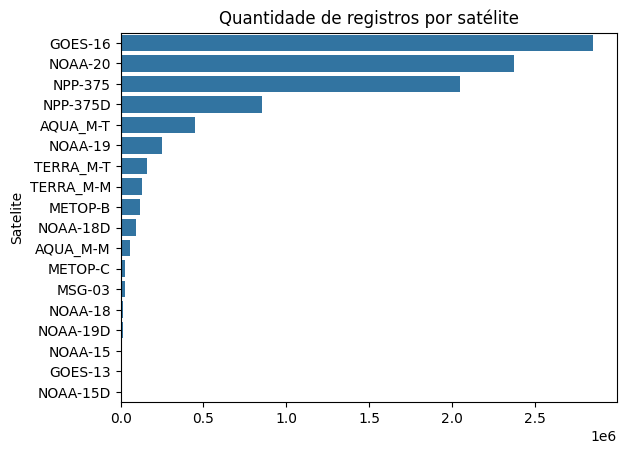

In [31]:
# Quantas vezes cada satélite reportou registrou um dado?
satelites = df_incendios['Satelite'].value_counts()
satelites_plot = sns.barplot(y=satelites.index, x=satelites.values).set_title(
    'Quantidade de registros por satélite')

Nota-se que alguns satélites provavelmente são muito novos ou foram descomissionados.

    Os satélites disponíveis ao longo dos anos foram sempre os mesmos? 

Conforme plots exibidos abaixo, nota-se que alguns satélites, como o GOES-13 e o NOAA-15, não atuaram em todos os anos.

In [32]:
# Utilizando o método groupby, agrupou-se o dataset por ano e satélite, e as ocorrencias foram contadas
satelites_by_year = df_incendios.groupby(
    [df_incendios['DataHora'].dt.year, 'Satelite']).size().reset_index(name='Count')

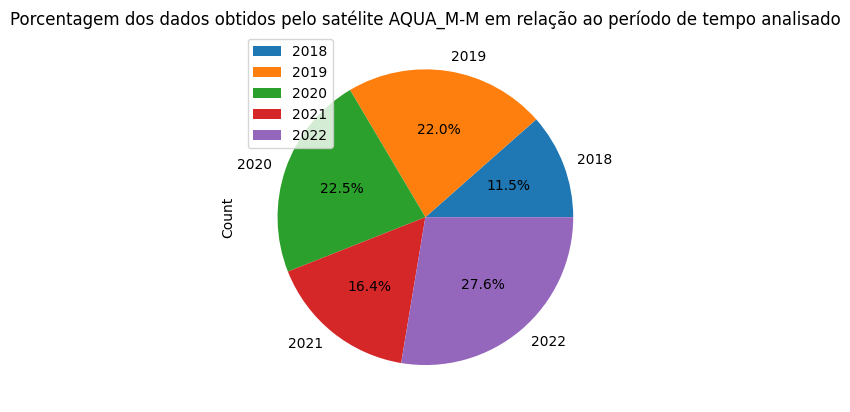

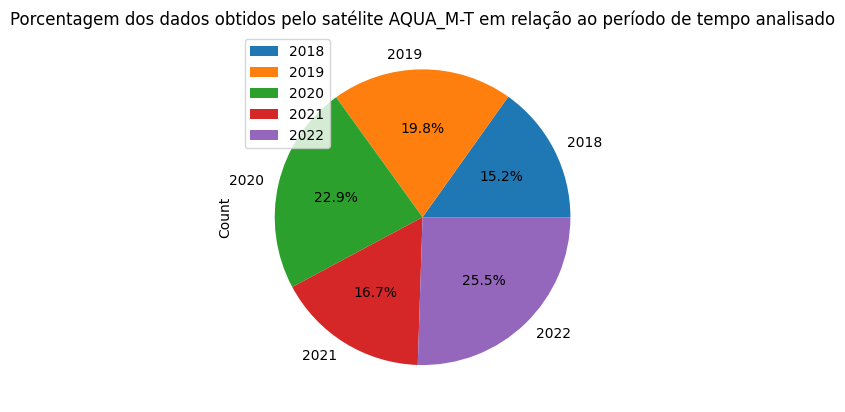

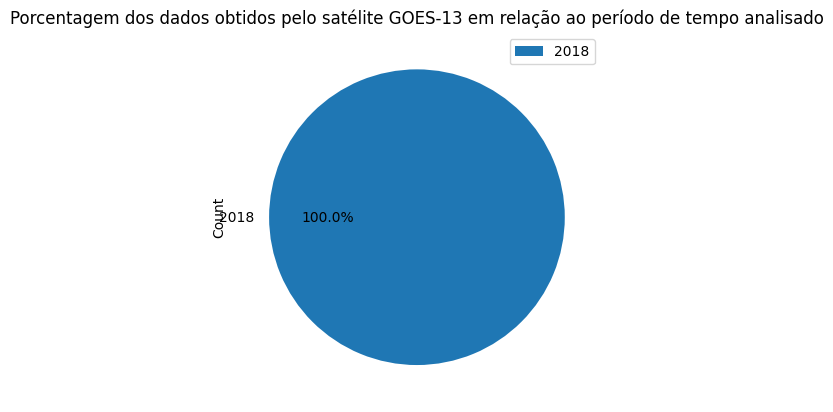

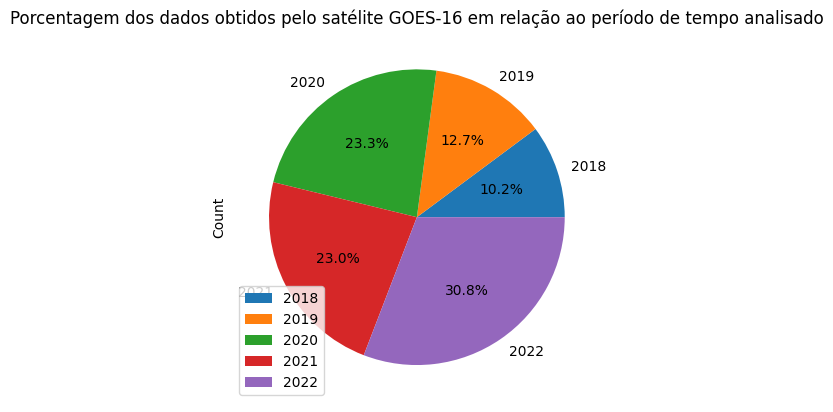

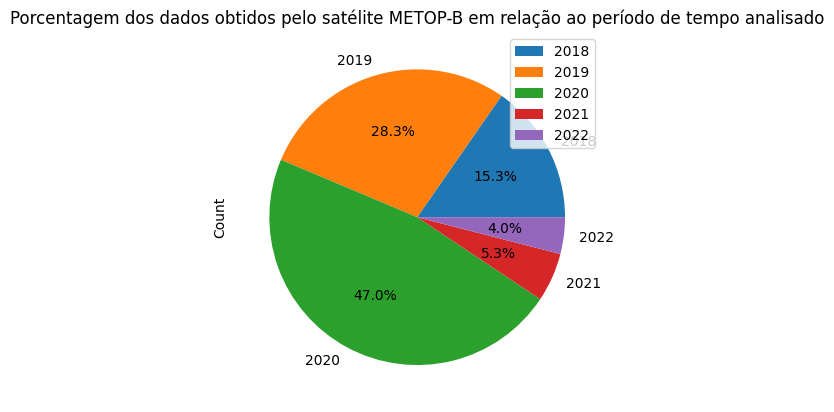

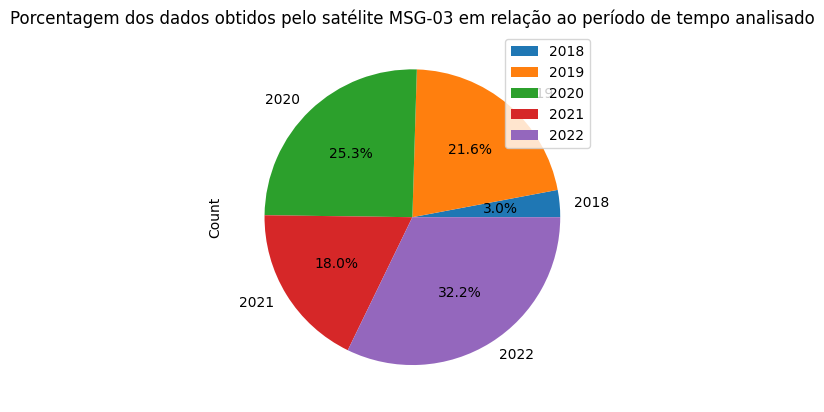

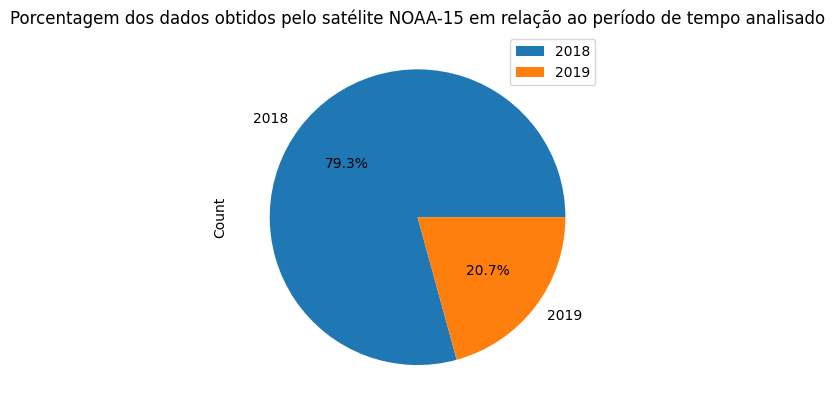

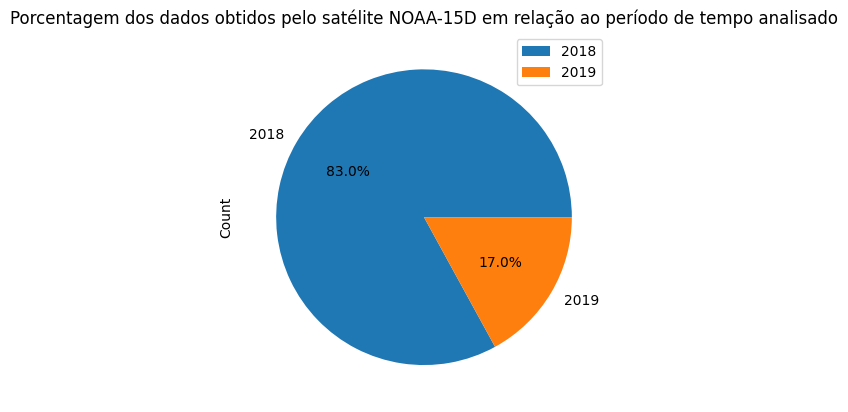

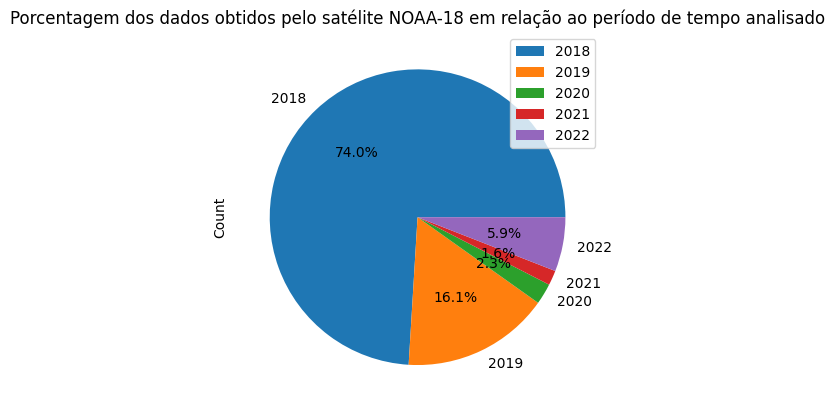

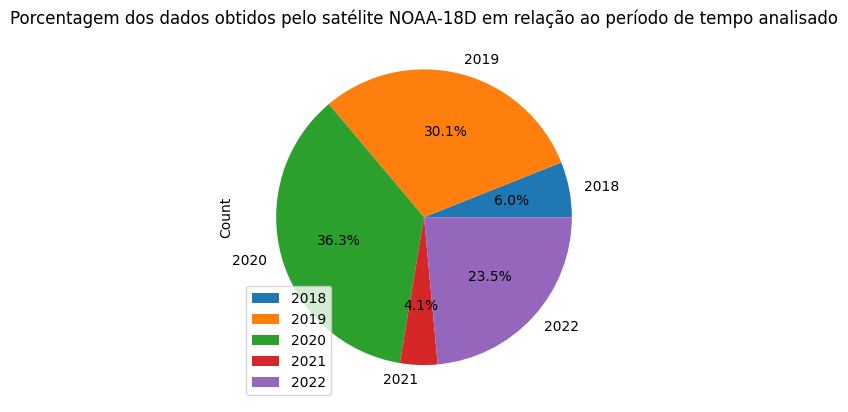

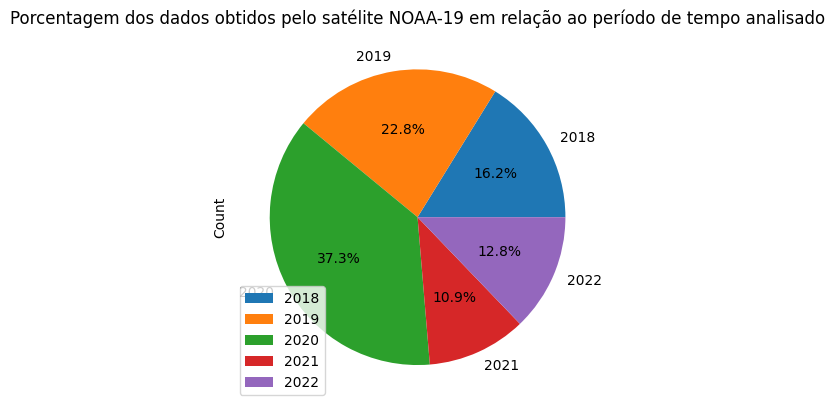

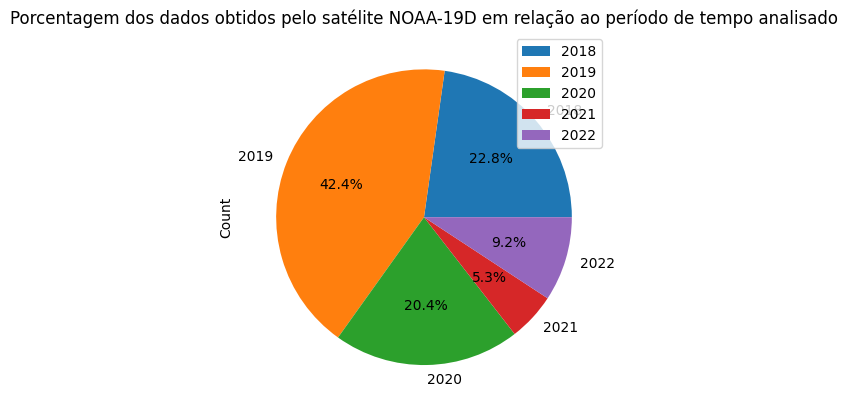

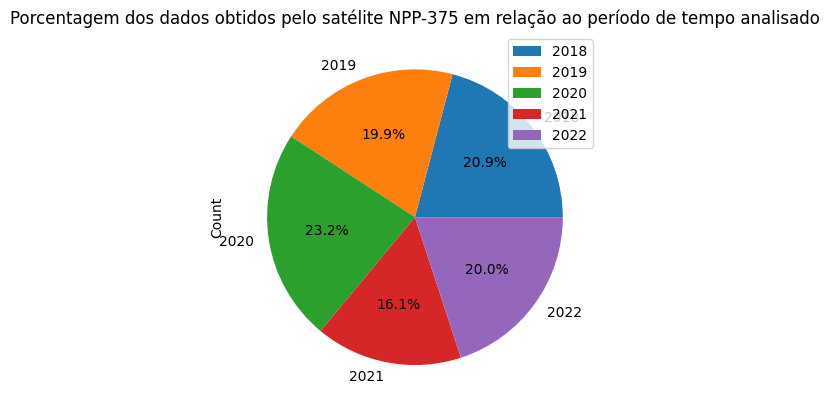

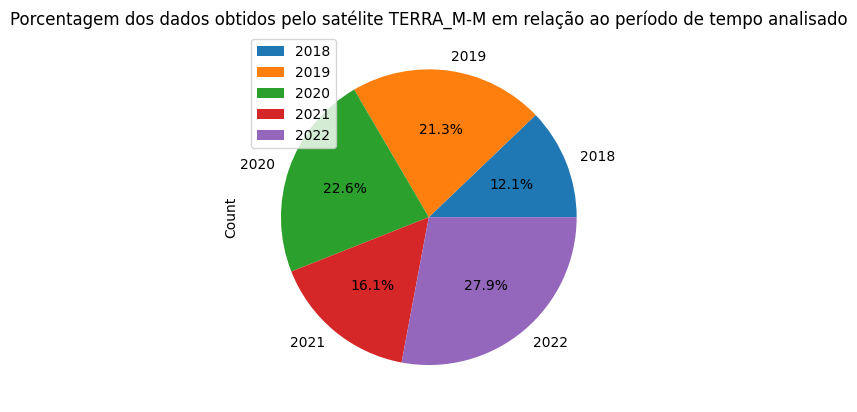

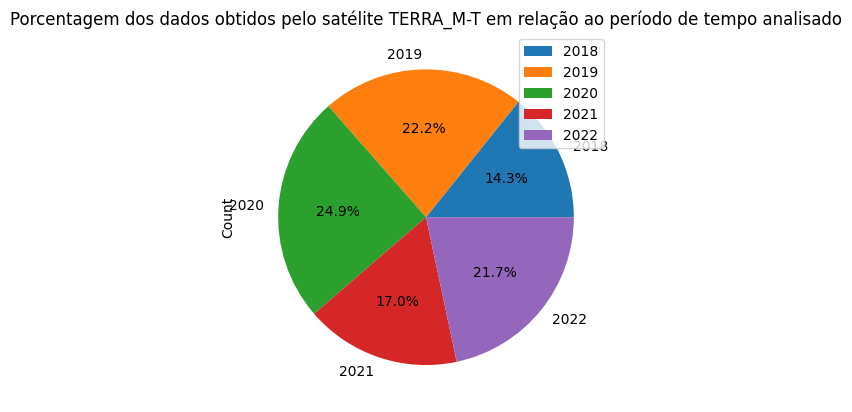

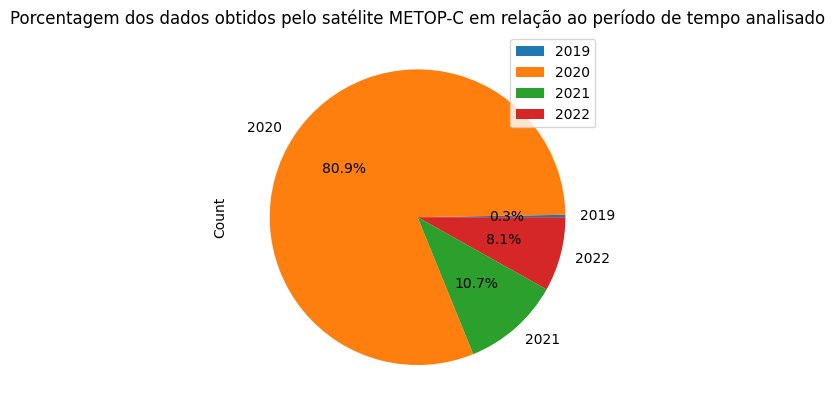

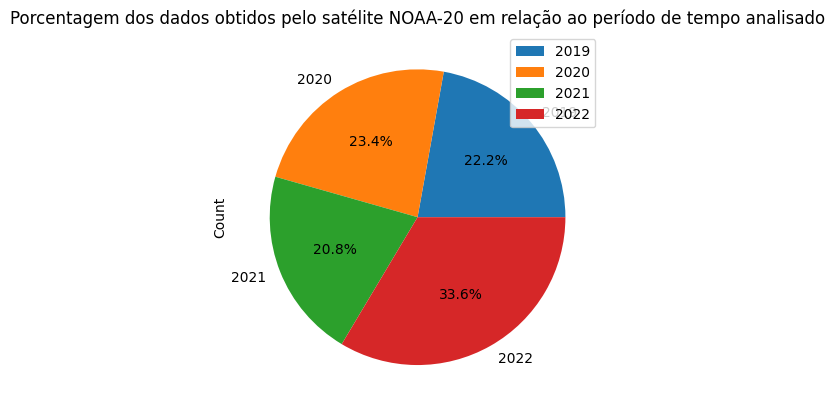

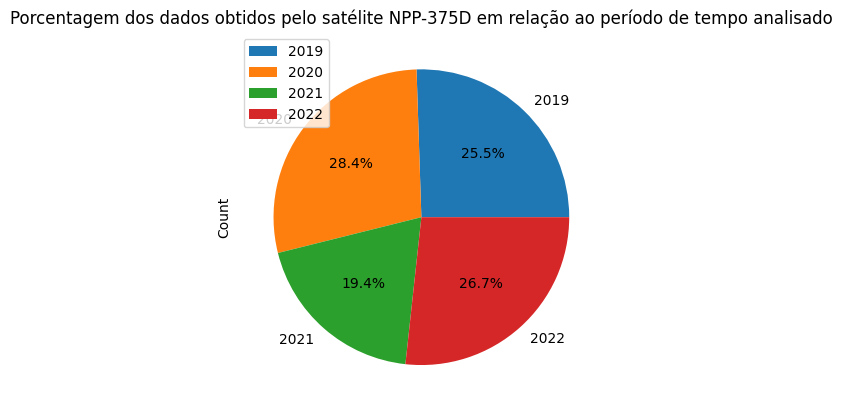

In [33]:
# Em quais anos cada satélite reportou dados?
for y in satelites_by_year['Satelite'].unique():
    (satelites_by_year.loc[satelites_by_year['Satelite']
                           == y].plot(kind='pie', y='Count', autopct='%1.1f%%', labels=satelites_by_year.loc[satelites_by_year['Satelite'] == y]['DataHora'], title=f'Porcentagem dos dados obtidos pelo satélite {y} em relação ao período de tempo analisado'))

---

**B. estados.csv**

In [34]:
# Leitura inicial do dataset e verificação com head()
df_estados = load_dataset(data_file='estados')
df_estados.head(3)

,Estado,Municipio
0,MATO GROSSO,MARCELANDIA
1,MATO GROSSO,COLNIZA
2,MATO GROSSO,JUARA


    Qual é a dimensão do conjunto de dados?

In [35]:
df_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Estado     550 non-null    object
 1   Municipio  550 non-null    object
dtypes: object(2)
memory usage: 8.7+ KB


In [36]:
print(
    f"Há {df_estados.shape[0]} linhas e {df_estados.shape[1]} colunas no dataset. Logo {df_estados.size} elementos.")

Há 550 linhas e 2 colunas no dataset. Logo 1100 elementos.


    Quantos municípios e quantos estados estão presentes? 

In [37]:
# Contagem de valores únicos para cada coluna
num_states = df_estados['Estado'].nunique()
num_municipios = df_estados['Municipio'].nunique()
print(f"Há {num_municipios} municipios e {num_states} estados no dataset.")

Há 546 municipios e 9 estados no dataset.


    Existem valores NaN?

In [38]:
# Verificação de valores nulos
df_estados.isna().sum()

Estado       0
Municipio    0
dtype: int64

Não há valores NaN, conforme `df_estados.isna().sum()`.

---

## SEGUNDA PARTE

É necessário deletar os valores NaN para que não interfiram nos dados e os valores -999 da coluna RiscoFog. Segundo os dados de focos de queimadas detectados para o Brasil (INPE, 2019), o número -999 representa valor inválido, normalmente relacionado como área urbana ou corpos d'água, onde não faz sentido calcular o Risco de Fogo.

In [39]:
df_incendios.dropna(inplace=True)
df_incendios = df_incendios.query('RiscoFog != -999')

In [40]:
ano = df_incendios['DataHora'].dt.year
mês = df_incendios['DataHora'].dt.month
municipio = df_incendios['Municipi']

In [41]:
df = pd.DataFrame({'Ano': ano, 'Mês': mês, 'Municipio': municipio})
df = df.merge(df_estados, on='Municipio', how='left')
df = df.drop(columns=['Municipio'])

In [42]:
df['N° de ocorrências'] = df.groupby(
    ['Ano', 'Mês', 'Estado']).transform('size')
df = df.drop_duplicates()
df = df.sort_values(by=['Ano', 'Mês', 'Estado'])

In [43]:
df.to_csv('ocorrencias.csv', index=False)

In [44]:
df

,Ano,Mês,Estado,N° de ocorrências
1346,2018,1,ACRE,31
65,2018,1,AMAPA,90
1,2018,1,AMAZONAS,295
14,2018,1,MARANHAO,1393
0,2018,1,MATO GROSSO,2182
...,...,...,...,...
5153233,2022,12,MATO GROSSO,1604
5153232,2022,12,PARA,12631
5155190,2022,12,RONDONIA,1149
5155145,2022,12,RORAIMA,1956


    Evolução do número total de incêndios ao longo dos anos. Existe uma tendência assinalável?
    Quais os anos em que o número de incêndios foi mínimo e máximo?

In [45]:
total_por_ano = df.groupby('Ano')['N° de ocorrências'].sum()
print(
    f'Maior quantidade de incêndios foi em {total_por_ano.idxmax()} com {total_por_ano.max()} ocorrências.')
print(
    f'Menor quantidade de incêndios foi em {total_por_ano.idxmin()} com {total_por_ano.min()} ocorrências.')

Maior quantidade de incêndios foi em 2022 com 2471269 ocorrências.
Menor quantidade de incêndios foi em 2018 com 909934 ocorrências.


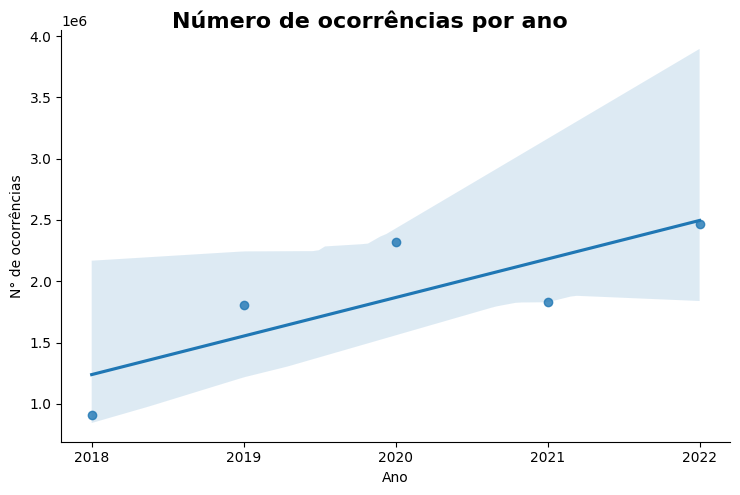

In [46]:
ax = sns.lmplot(x='Ano', y='N° de ocorrências',
                data=total_por_ano.reset_index(), height=5, aspect=1.5)

ax.fig.suptitle('Número de ocorrências por ano',
                fontsize=16, fontweight='bold')
plt.xticks(df['Ano'].unique())
plt.show()

As ocorrências tendem a crescer ao passar dos anos.

    Distribuição do número de incêndios ao longo dos meses do ano (valores médios no intervalo representado). 

In [47]:
df_2022 = df.query('Ano == 2022')

In [48]:
monthly_occurrences = df_2022.groupby('Mês')['N° de ocorrências'].mean()

for month, occurrences in monthly_occurrences.items():
    print(f'No mês {month}, a média do número de ocorrências foi de {
          occurrences:.2f}')

No mês 1, a média do número de ocorrências foi de 2192.78
No mês 2, a média do número de ocorrências foi de 1056.11
No mês 3, a média do número de ocorrências foi de 523.67
No mês 4, a média do número de ocorrências foi de 1507.78
No mês 5, a média do número de ocorrências foi de 6470.11
No mês 6, a média do número de ocorrências foi de 8070.44
No mês 7, a média do número de ocorrências foi de 10888.33
No mês 8, a média do número de ocorrências foi de 77383.56
No mês 9, a média do número de ocorrências foi de 104447.56
No mês 10, a média do número de ocorrências foi de 36678.11
No mês 11, a média do número de ocorrências foi de 22778.89
No mês 12, a média do número de ocorrências foi de 2588.11


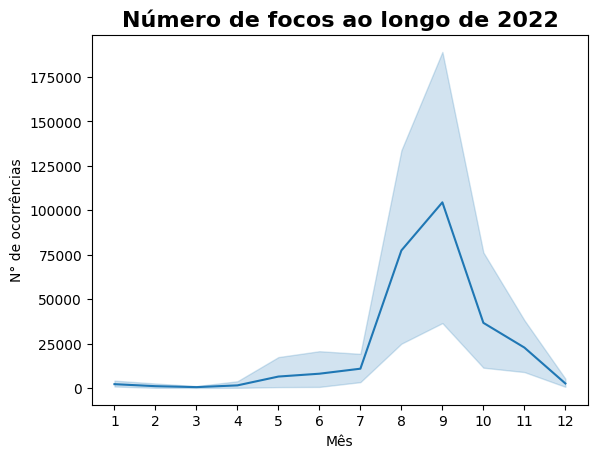

In [49]:
ax2 = sns.lineplot(x='Mês', y='N° de ocorrências', data=df_2022)

ax2.set_title('Número de focos ao longo de 2022',
              fontsize=16, fontweight='bold')

plt.xticks(df_2022['Mês'].unique())
plt.show()

    Número total de incêndios em cada estado no intervalo representado, assim como o valor médio e o respetivo desvio padrão. Quais os estados com número máximo e mínimo de incêndios?

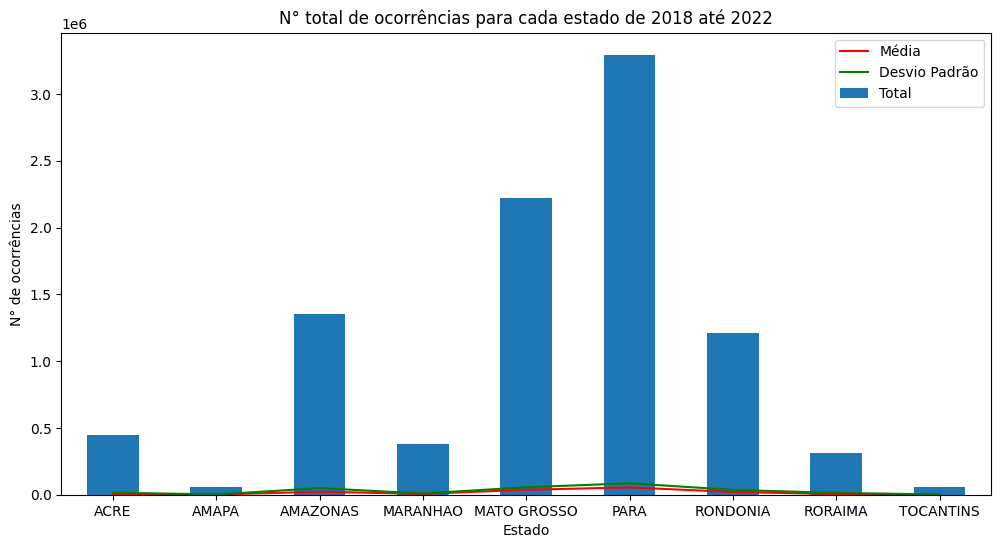

In [50]:
# Calcula o total de ocorrências para cada estado
total_occurrences = df.groupby('Estado')['N° de ocorrências'].sum()

# Calcula a média e o desvio padrão de ocorrências para cada estado
avg_occurrences = df.groupby('Estado')['N° de ocorrências'].mean()
std_occurrences = df.groupby('Estado')['N° de ocorrências'].std()

# Plota se os dados
fig, ax = plt.subplots(figsize=(12, 6))
total_occurrences.plot(kind='bar', ax=ax, label='Total')
avg_occurrences.plot(kind='line', ax=ax, color='red', label='Média')
std_occurrences.plot(kind='line', ax=ax, color='green',
                     label='Desvio Padrão')

ax.set_xlabel('Estado')
ax.set_ylabel('N° de ocorrências')
ax.set_title('N° total de ocorrências para cada estado de 2018 até 2022')
ax.legend()

plt.show()

In [51]:
total_occurrences[total_occurrences == total_occurrences.max()]

Estado
PARA    3294781
Name: N° de ocorrências, dtype: int64

In [52]:
total_occurrences[total_occurrences == total_occurrences.min()]

Estado
TOCANTINS    54593
Name: N° de ocorrências, dtype: int64

In [53]:
avg_occurrences

Estado
ACRE            7415.400000
AMAPA           1001.100000
AMAZONAS       22599.033333
MARANHAO        6276.133333
MATO GROSSO    37062.766667
PARA           54913.016667
RONDONIA       20213.016667
RORAIMA         5252.166667
TOCANTINS        909.883333
Name: N° de ocorrências, dtype: float64

In [54]:
std_occurrences

Estado
ACRE           15610.421948
AMAPA           2027.189268
AMAZONAS       49301.118445
MARANHAO        9240.474099
MATO GROSSO    55976.705824
PARA           85610.651922
RONDONIA       36129.635437
RORAIMA        13914.255569
TOCANTINS       1618.195941
Name: N° de ocorrências, dtype: float64

    Use os estados identificados na questão anterior e analise a evolução do número de incêndios ao longo dos anos em cada um desses estados.

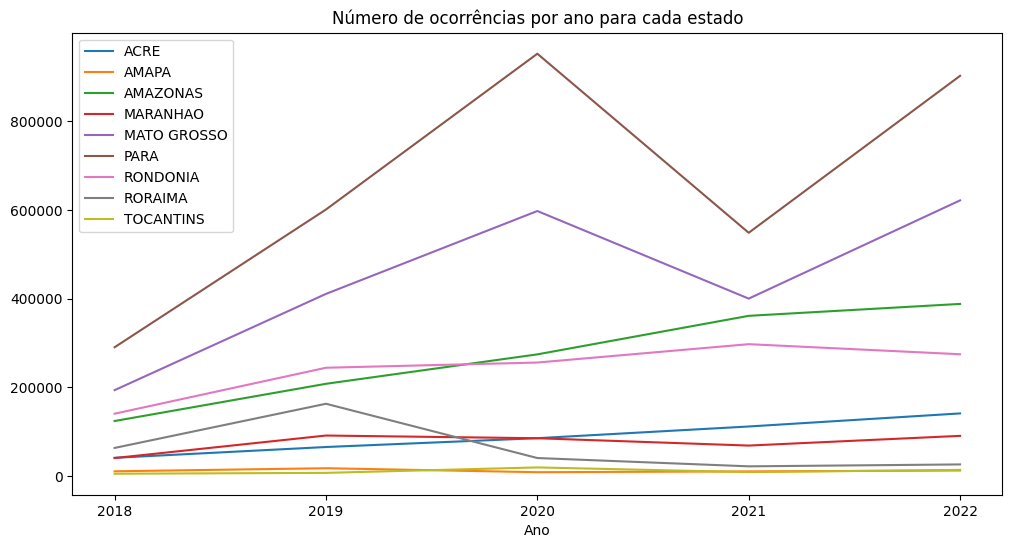

In [55]:
states = df['Estado'].unique()

for state in states:
    df_state = df.query(f'Estado == "{state}"')
    df_state = df_state.groupby('Ano')['N° de ocorrências'].sum()
    df_state.plot(kind='line', label=state, figsize=(12, 6), legend=state,
                  title='Número de ocorrências por ano para cada estado', xticks=df_state.index)